<a href="https://colab.research.google.com/github/MphoPetunia/SpecsSurveyData/blob/main/companyproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data Cleaning and Exploration***

Task 1: Loading and Exploring the dataset

In [ ]:
import pandas as pd

data =pd.read_csv("Dots Customer Survey.csv")
data.head()




,Unique ID,Country,Age,Annual Family Income ($),Gender,Time spent watching videos/TV,Time spent playing indoor sports,Time spent playing outdoor sports,Total Time spent working in front of screen,Sleeping hours,...,Has OTT subscription,Number of friends,Likes spicy food,Likes desserts,Wants to change career,Has debt,Has kids,Drinks alcohol,Smoker,Wear Specs
0,7319483,CAN,13,20423,Male,3,4,3,7,8,...,1,4,0,1,0,0,0,0,0,1
1,4791965,CAN,13,5570,Female,3,3,1,10,3,...,1,6,0,1,0,0,0,0,1,1
2,2991718,CAN,13,58706,Female,2,2,1,4,9,...,0,5,0,0,0,0,0,0,0,0
3,4220106,CAN,13,57118,Male,6,2,4,10,11,...,1,9,0,1,0,0,0,0,0,0
4,2263008,CAN,14,59834,Male,6,3,4,13,12,...,1,6,1,0,0,0,0,0,0,0


In [ ]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())

print("\nSummary Statistics:")
print(data.describe())


Missing Values:
Unique ID                                                  0
Country                                                    0
Age                                                        0
Annual Family Income ($)                                   0
Gender                                                     0
Time spent watching videos/TV                              0
Time spent playing indoor sports                           0
Time spent playing outdoor sports                          0
Total Time spent working in front of screen                0
Sleeping hours                                             0
IQ                                                         0
Whether parents have specs                                 0
English speaker                                            0
Migrated within country                                    0
Migrated overseas                                          0
Maritial Status (0 - Single, 1 - Married, 2 - Divorced)    0
Has Dia

In [ ]:
# Fill missing values for numerical columns with the median
numerical_columns = ["Time spent playing outdoor sports", "Total Time spent working in front of screen"]
for column in numerical_columns:
    data[column].fillna(data[column].median())

# Fill missing values for categorical columns with the mode
categorical_columns = ["Whether parents have specs"]
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0])

# Verify that no missing values remain
print("Missing Values After Imputation:")
print(data.isnull().sum())



Missing Values After Imputation:
Unique ID                                                  0
Country                                                    0
Age                                                        0
Annual Family Income ($)                                   0
Gender                                                     0
Time spent watching videos/TV                              0
Time spent playing indoor sports                           0
Time spent playing outdoor sports                          0
Total Time spent working in front of screen                0
Sleeping hours                                             0
IQ                                                         0
Whether parents have specs                                 0
English speaker                                            0
Migrated within country                                    0
Migrated overseas                                          0
Maritial Status (0 - Single, 1 - Married, 2 - Divorc

In [ ]:
# Replace negative values with NaN for specific columns
columns_to_check = ["Sleeping hours", "Time spent playing outdoor sports", "Total Time spent working in front of screen"]
for column in columns_to_check:
    data[column] = data[column].apply(lambda x: x if x >= 0 else None)

# Fill the new NaN values with the median
for column in columns_to_check:
    data[column].fillna(data[column].median())

# Verify that all values are valid
print("Minimum values after fixing invalid data:")
print(data[columns_to_check].min())


Minimum values after fixing invalid data:
Sleeping hours                                 0.0
Time spent playing outdoor sports              0.0
Total Time spent working in front of screen    0.0
dtype: float64


Outliers are extreme values tjat fall outside a reasonable range.
The IQR method identifies outliers as values outside 1.5 time the interquartile range.

In [32]:
# Function to handle outliers using IQR
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with NaN
    df[column] = df[column].apply(lambda x: x if lower_bound <= x <= upper_bound else None)
    return df

# Apply the function to relevant columns
columns_to_check = ["Sleeping hours", "Time spent playing outdoor sports", "Total Time spent working in front of screen"]
for col in columns_to_check:
    data = handle_outliers(data, col)

# Impute any new NaN values created by outlier removal
for col in columns_to_check:
    data[col] = data[col].fillna(data[col].median())

# Verify the changes
print("\nSummary Statistics After Handling Outliers:")
print(data[columns_to_check].describe())



Summary Statistics After Handling Outliers:
       Sleeping hours  Time spent playing outdoor sports  \
count     3220.000000                        3220.000000   
mean         7.673292                           1.766770   
std          2.029321                           1.118603   
min          2.000000                           0.000000   
25%          6.000000                           1.000000   
50%          8.000000                           2.000000   
75%          9.000000                           3.000000   
max         13.000000                           5.000000   

       Total Time spent working in front of screen  
count                                  3220.000000  
mean                                      8.157453  
std                                       2.710488  
min                                       0.000000  
25%                                       6.000000  
50%                                       8.000000  
75%                                      10

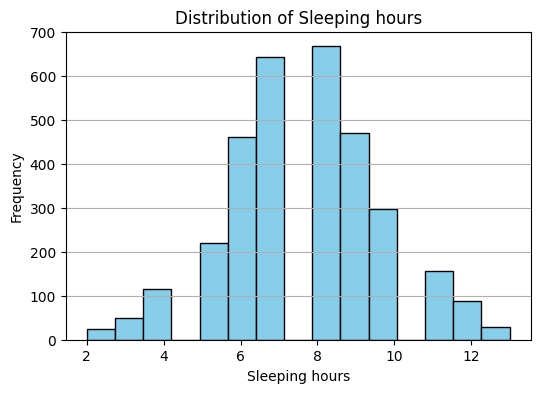

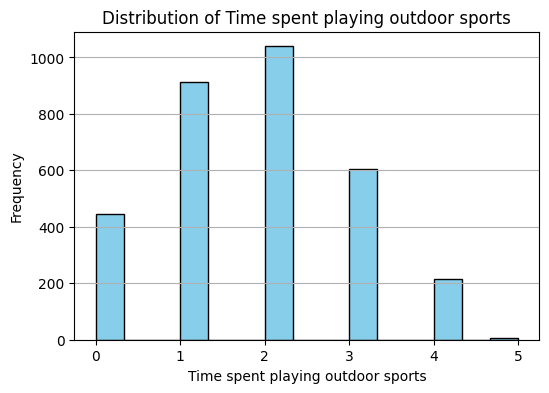

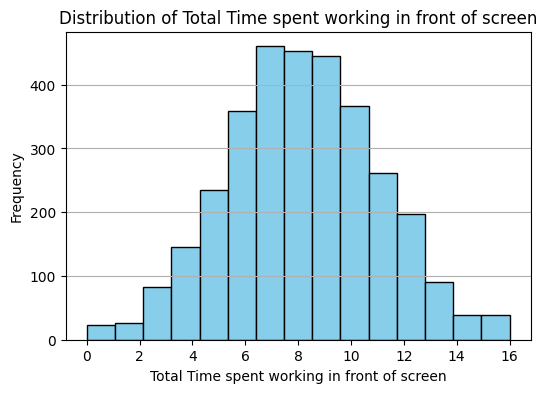

In [33]:
import matplotlib.pyplot as plt

# Plot distributions
columns_to_plot = ["Sleeping hours", "Time spent playing outdoor sports", "Total Time spent working in front of screen"]

for col in columns_to_plot:
    plt.figure(figsize=(6, 4))
    plt.hist(data[col], bins=15, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y')
    plt.show()


The purpose of cleaning the data in the first step was to ensure the dataset was  accurate, consistent and ready for anaysis and model training.

-Cleaning ensures consistency across all ddata points, removing potential errors or inconsistencies that could negaively impact the model's ability to find patterns.

-Handling missing  values is important because missing values can confuse the machine learning model as it does not know how to interpret blank spaces.


# *Feature Engineering and Visualization*

Step 1: Engineering New Features

In [ ]:
#Creating new featutes by combining existing ones (For example creating a feature that combines screen with physical activity)
import pandas as pd

data = pd.read_csv("Dots Customer Survey.csv")
#Engineering a new fearture
data['Total Activity level'] = (data['Time spent watching videos/TV'] + data['Time spent playing indoor sports']  + data['Time spent playing outdoor sports'])
print(data[['Total Activity level', 'Wear Specs']].head())



   Total Activity level  Wear Specs
0                    10           1
1                     7           1
2                     5           0
3                    12           0
4                    13           0


Step 2: Visualize Feature Distribution

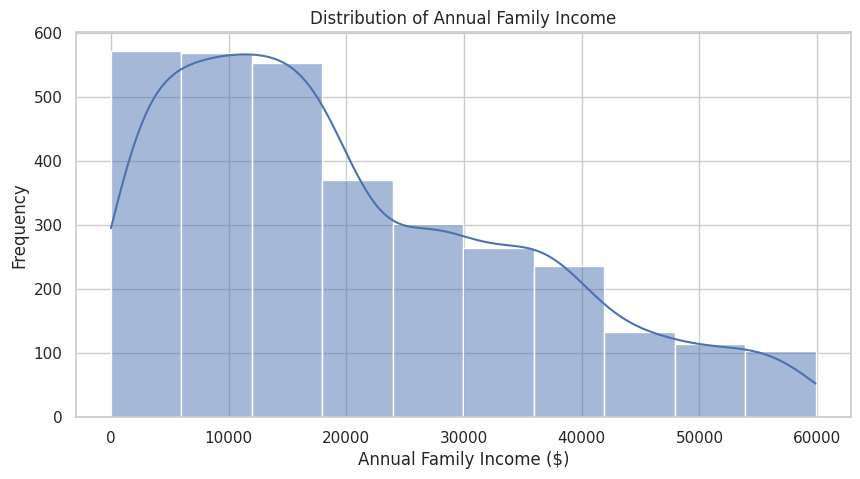

In [ ]:
#Using histograms and box plots to Visualize the distribution features such as Annual Family Income($) and Total Activity Level
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

#Histogram for Annual Family Income($)
plt.figure(figsize=(10,5))
sns.histplot(data['Annual Family Income ($)'], bins=10, kde=True)
plt.title('Distribution of Annual Family Income')
plt.xlabel('Annual Family Income ($)')
plt.ylabel('Frequency')
plt.show()

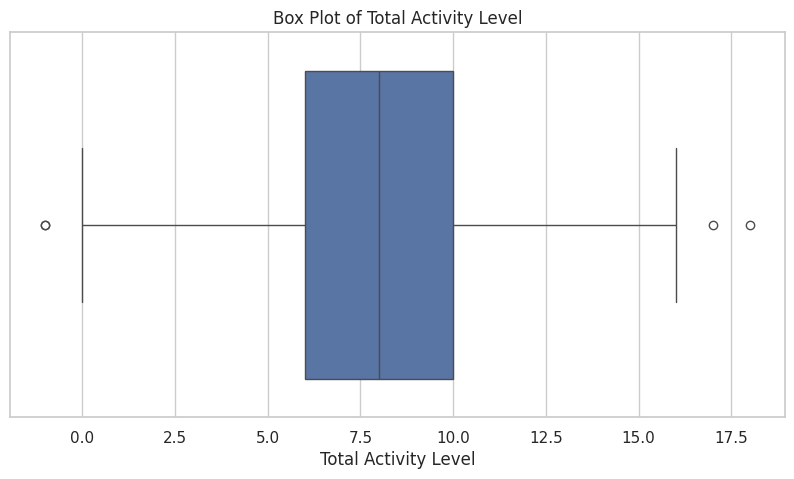

In [ ]:
#Box plot for Total Activity Level
plt.figure(figsize=(10,5))
sns.boxplot(x=data['Total Activity level'])
plt.title('Box Plot of Total Activity Level')
plt.xlabel('Total Activity Level')
plt.show()

Step 3: Exploring Relationships with Scatter Plots

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Dots Customer Survey.csv')

In [ ]:
# Feature Engineering: Calculating the Total Activity
# Summing up relevant columns to define "Total Activity"
data['Total Activity'] = (
    data['Time spent watching videos/TV'] +
    data['Time spent playing indoor sports'] +
    data['Time spent playing outdoor sports']
)

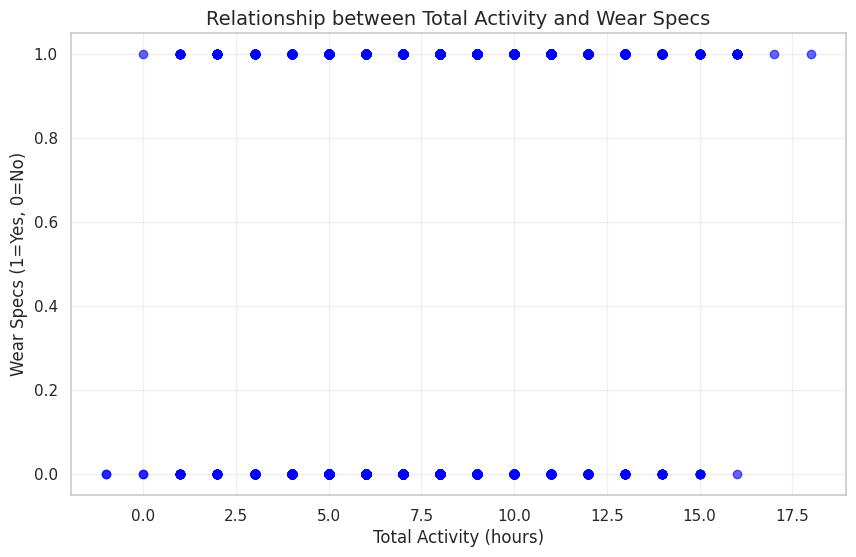

In [ ]:
# Scatter Plot: Relationship between Total Activity and Wear Specs
plt.figure(figsize=(10, 6))
plt.scatter(data['Total Activity'], data['Wear Specs'], alpha=0.6, color='blue')
plt.title("Relationship between Total Activity and Wear Specs", fontsize=14)
plt.xlabel("Total Activity (hours)", fontsize=12)
plt.ylabel("Wear Specs (1=Yes, 0=No)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Step 4: Performing Correlation Anaysis
Ina the final step I will copute a correlation matrix to identify correlation features.
In the final step I will compute a correlation matrix to identify correlated features.

Unique ID                                                   int64
Country                                                    object
Age                                                         int64
Annual Family Income ($)                                    int64
Gender                                                     object
Time spent watching videos/TV                               int64
Time spent playing indoor sports                            int64
Time spent playing outdoor sports                           int64
Total Time spent working in front of screen                 int64
Sleeping hours                                              int64
IQ                                                          int64
Whether parents have specs                                  int64
English speaker                                             int64
Migrated within country                                     int64
Migrated overseas                                           int64
Maritial S

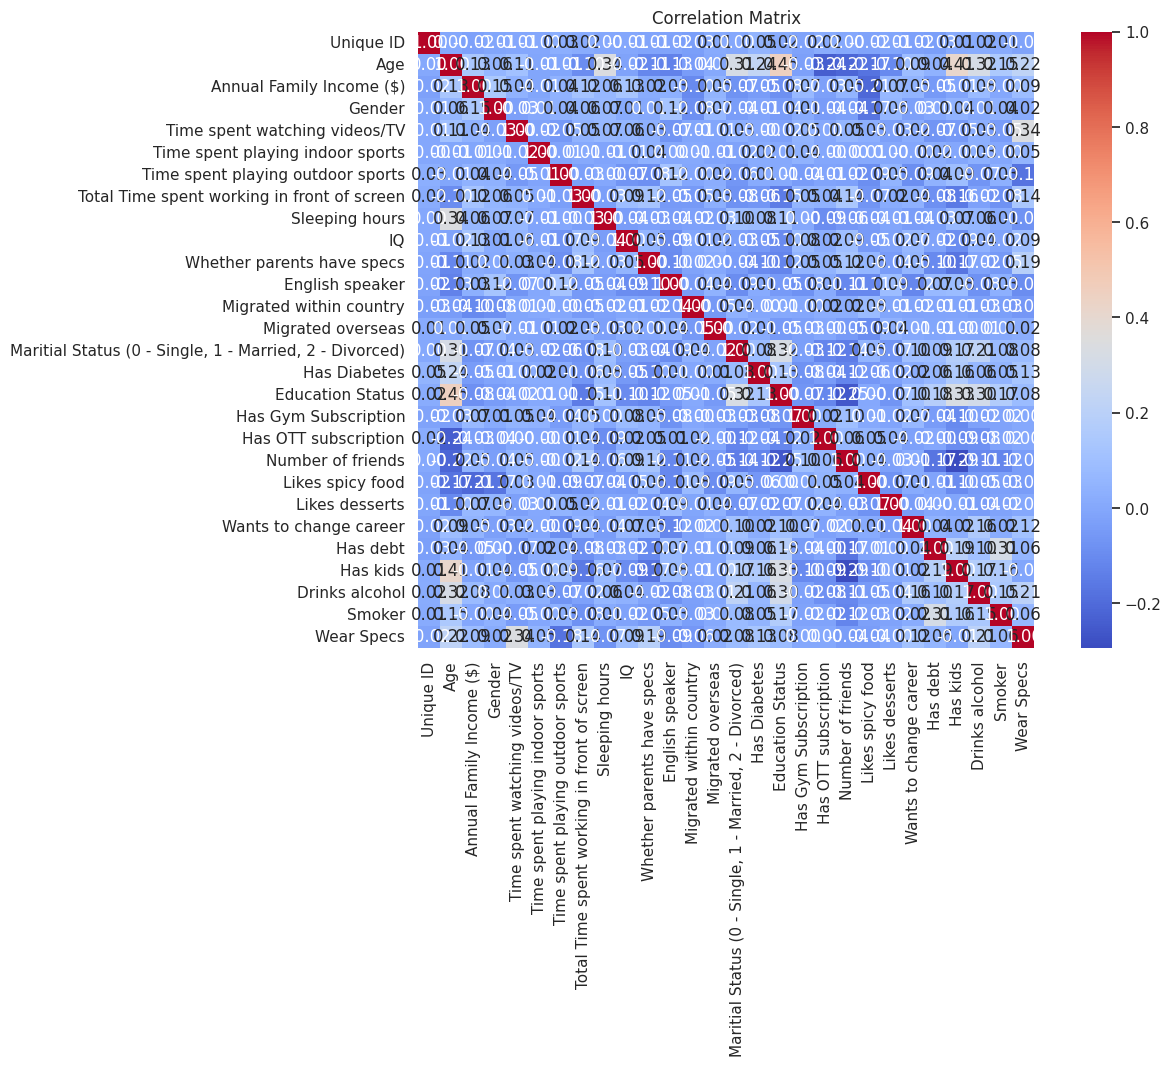

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Dots Customer Survey.csv')

# Checking data types
print(data.dtypes)

# Convert categorical variables to numeric if necessary
# Example: Convert 'Gender' and 'Education Status' to numeric
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Education Status'] = data['Education Status'].map({'Studying': 0, 'Graduate': 1, 'Dropout': 2})

# Dropping non-numeric columns if not needed for correlation
data_numeric = data.select_dtypes(include=['float64', 'int64'])

# Handling missing values by dropping rows with NaN values
data_numeric = data_numeric.dropna()

# Computting the correlation matrix
correlation_matrix = data_numeric.corr()

# Displaying the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

***In conclusion***, These insights provide a foundational understanding of the factors influencing eyewear usage among young Canadians. They highlight the importance of demographic variables, lifestyle choices, and familial influences in shaping consumer behavior regarding eye care products. Moving forward, these findings will inform further exploratory analyses and predictive modeling efforts aimed at understanding and addressing the needs of this demographic in the eyewear market.

# ***Building and Evaluating Machine Learning Model***

  In the next section, will be building and evaluating a model to gain valuable insights into customer behavior, make informed decisions and develop strategies that align with customer needs in the eyewear market.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("Dots Customer Survey.csv")


## **Processing the Data**
Checking for Missing Values

In [ ]:
if data.isnull().sum().any():
    print("Missing values found. Filling with median or dropping...")
    data.fillna(data.median(), inplace=True)
#This checks if there are any missing values in the dataset. If found, it fills them with the median of their respective columns to avoid losing data.

# **Converting Categorical Variables to Numeric**

In [ ]:
data = pd.get_dummies(data, drop_first=True)
#Categorical variables (like gender) are converted into numerical format using one-hot encoding. This is necessary because machine learning models work with numerical values.

## **Selecing Features and Target Variable**

In [ ]:
features = data.drop(columns=['Wear Specs'])
target = data['Wear Specs']

#Here, we separate the features (independent variables) from the target variable (dependent variable). The target variable is whether individuals wear glasses (Wear Specs).


# **Split the Data into Training and Testing Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
#The dataset is divided into training (80%) and testing (20%) sets. The training set is used to train the model, while the testing set evaluates its performance.

# **Verify Dimensions**

In [ ]:
print(f'Training feature shape: {X_train.shape}, Training target shape: {y_train.shape}')
#This prints out the dimensions of the training features and target variable to ensure they are correct.

Training feature shape: (2576, 31), Training target shape: (2576,)


# **Choose a Machine Learning Model**

In [ ]:
model = RandomForestClassifier(random_state=42)
#A Random Forest Classifier is selected for this binary classification task. Random Forests are effective for handling complex datasets with multiple features.

# **Training the Model**

In [ ]:
model.fit(X_train, y_train)
#The model is trained on the training data using the fit method

RandomForestClassifier(random_state=42)

# **Making predictions**

In [ ]:
y_pred = model.predict(X_test)
#After training, predictions are made on the testing set using the predict method

## **Evaluating Model Performance**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
#Various metrics are calculated to evaluate how well the model performed

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')


Accuracy: 0.78
Precision: 0.76
Recall: 0.85
AUC-ROC: 0.84


# **Plotting AUC-ROC Curve**

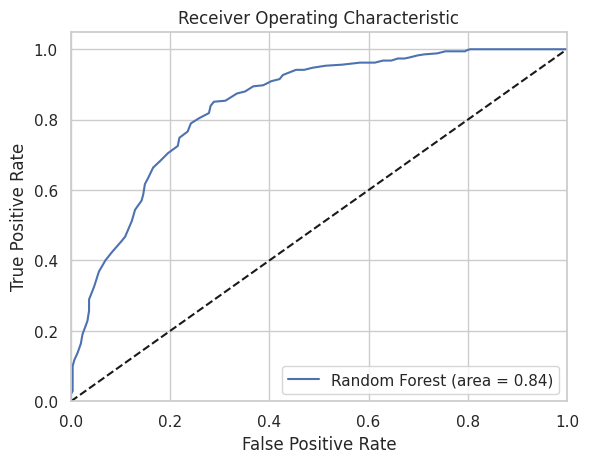

In [ ]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
#This section generates an AUC-ROC curve plot to visualize the trade-off between true positive rates and false positive rates at various thresholds

The evaluation of this machine learning model highlights critical factors influencing eyewear usage among surveyed individuals. By understanding these predictors, stakeholders can make informed decisions in marketing, health awareness, and product development tailored to consumer needs. The insights derived from this analysis not only enhance our understanding of consumer behavior but also provide actionable strategies for businesses and health organizations.